In [1]:
from src import UDP_RX, SlidingBook, MACChecker
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import json
import socket
import struct
import pickle





# Getting the Parameters from the sender and Calculating the offset
def receive_param(IP, PORT):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((IP, PORT))
        s.listen()
        conn, addr = s.accept()
        with conn:

            param = b''
            while True:
                data = conn.recv(1024)
                if not data or data == b'END':
                    break
                param += data
            # print(param)
            data2 = conn.recv(16)
            # print(data2)
            offset = time.time() - struct.unpack('d', data2)[0]
            
        param = json.loads(param.decode('utf-8'))
        param['OFFSET'] = offset 
        return param


def run_experiment(IP, PORT, param):
    total_avg_verification = []
    goodput_total = []
    total_latency = []
    framecnt_total = []

    cnt = 0
    framecnt = 0
    start_frame_cnt = time.time()
    start = time.time()

    while True:

        buffer =  SlidingBook(num_pages=100, page_size=len(param['X']))
        page_processor = MACChecker(X = param['X'], Y = param['Y'], secret_key=param['KEY'].encode(), digestmod=param['DIGESTMOD'])
        udp_rx = UDP_RX(IP= IP, PORT= PORT, buffer=buffer, page_processor= page_processor, Payload_Size_Byte=param['PAYLOAD_SIZE_BYTE'])

        msg, verification_count, latency, goodput = udp_rx.receive()
        total_avg_verification.append(np.average(verification_count))
        total_latency.append(np.average(latency))
        goodput_total.append(goodput)


        if msg is not None and len(msg) > 0:  # Ensure rec is not None and has valid data
            nparr = np.frombuffer(msg, np.uint8)
            
            if nparr is not None and len(nparr) > 0:  # Check if nparr is valid
                try:
                    frame = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
                    
                    if frame is not None:  # Ensure that the frame is successfully decoded
                        cv2.imshow('Received Video', frame)
                        framecnt += 1
                        if time.time() - start_frame_cnt > 1:
                            framecnt_total.append(framecnt)
                            start_frame_cnt = time.time()
                            print(f"{framecnt} fps")
                            framecnt = 0
                            
                        if cv2.waitKey(1) & 0xFF == ord('q'):
                            break
                    else:
                        # print("Failed to decode frame.")
                        pass
                except Exception as e:
                    # print(f"Error decoding frame: {e}")
                    pass
            else:
                # print("Empty or invalid buffer received.")
                pass
        else:
            # print("Received an empty or invalid page.")
            pass

        if cnt % 100 == 0:
            print(f"avg_verification: {np.average(total_avg_verification)}, latency: {np.average(total_latency)}")
        cnt += 1
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        if time.time() - start > param['DURATION']:
            break

    cv2.destroyAllWindows()

    ## saving the parameters and the results as a json file

    results = {
        "avg_verification": total_avg_verification,
        "latency": total_latency,
        "goodput": goodput_total,
        "frame_rate": framecnt_total,
        "param": param
    }   

    # read a pickle file to get the previous results

    try:
        with open("results.pkl", 'rb') as f:
            file = pickle.load(f)
            experiment_nr = len(file)
            file[experiment_nr]=results
            with open("results.pkl", 'wb') as f:
                pickle.dump(file, f)
    except:
        # create a new file
        print("Creating a new file")
        file = {0:results}
        with open("results.pkl", 'wb') as f:
            pickle.dump(file, f)


#### parameters that needs to be exhanged between the sender and the receiver #####
IP = "0.0.0.0"
PORT = 23422
#################################################################################### 
## test the receiver
param = receive_param(IP=IP, PORT=PORT)
run_experiment(IP=IP, PORT=PORT, param=param)

2024-09-04 12:27:37.022 Python[48834:828529] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


avg_verification: 1.0, latency: -0.0038401269912719726
10 fps
18 fps


/Users/mohammadkashani/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/mohammadkashani/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


16 fps
18 fps
avg_verification: nan, latency: nan
18 fps
17 fps
18 fps
17 fps
18 fps
avg_verification: nan, latency: nan


In [2]:
#### parameters that needs to be exhanged between the sender and the receiver #####
IP = "0.0.0.0"
PORT = 23422
#################################################################################### 
while True:
    param = receive_param(IP=IP, PORT=PORT)
    run_experiment(IP=IP, PORT=PORT, param=param)
    time.sleep(.1)

avg_verification: 10.0, latency: -0.016584661163267542
7 fps
6 fps
8 fps
10 fps
avg_verification: 10.0, latency: -0.029057997826464635
9 fps
9 fps
10 fps
9 fps
avg_verification: 10.0, latency: -0.02924133879420345
9 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 434 extraneous bytes before marker 0xda


avg_verification: 9.918032786885245, latency: -0.017788732062134896


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 15 extraneous bytes before marker 0xc4
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


8 fps


Corrupt JPEG data: 78 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 318 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


10 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


9 fps


Corrupt JPEG data: 405 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: 328 extraneous bytes before marker 0xda


7 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 850 extraneous bytes before marker 0xda


avg_verification: 9.887864877635836, latency: -0.03092175195750612


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 367 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 98 extraneous bytes before marker 0xd9


11 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


9 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


10 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


8 fps
avg_verification: 9.894698845036114, latency: -0.03028395815684928


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code


10 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9


avg_verification: 10.0, latency: -0.0008842073380947112
11 fps
18 fps
16 fps
17 fps
avg_verification: nan, latency: nan
17 fps
17 fps
16 fps
16 fps
avg_verification: nan, latency: nan
16 fps
avg_verification: 10.0, latency: -0.016554488241672514


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


11 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


16 fps


Corrupt JPEG data: 341 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


16 fps


Corrupt JPEG data: 299 extraneous bytes before marker 0xda
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code


17 fps


Corrupt JPEG data: premature end of data segment


avg_verification: nan, latency: nan


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 888 extraneous bytes before marker 0xda


16 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: 16060 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


17 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: 78 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


20 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 202 extraneous bytes before marker 0xc4
Corrupt JPEG data: premature end of data segment


avg_verification: nan, latency: nan
17 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


17 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1220 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment


avg_verification: 6.0, latency: -0.018304811735622217
6 fps
9 fps
7 fps
11 fps
avg_verification: 6.0, latency: -0.02942591584050733
11 fps
10 fps
10 fps
9 fps
avg_verification: 6.0, latency: -0.029451132729806945
9 fps
avg_verification: 6.0, latency: -0.014051514322107486


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: 17 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment


5 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


7 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 138 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 354 extraneous bytes before marker 0xda


11 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


avg_verification: 5.9685271917004155, latency: -0.029603293140758467
5 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


8 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


10 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


11 fps
avg_verification: 5.964297403383497, latency: -0.030107455347477583


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 168 extraneous bytes before marker 0xda
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


10 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


9 fps
avg_verification: 6.0, latency: 0.014769391218821206
10 fps
16 fps
18 fps
17 fps
avg_verification: nan, latency: nan
19 fps
17 fps
19 fps
avg_verification: nan, latency: nan
19 fps
17 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


avg_verification: 5.88, latency: 0.017410436638614586


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 471 extraneous bytes before marker 0xc4
Corrupt JPEG data: premature end of data segment


12 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


15 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


16 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3954 extraneous bytes before marker 0xc4


15 fps
avg_verification: nan, latency: nan


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 539 extraneous bytes before marker 0xc4


16 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


17 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


17 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


avg_verification: nan, latency: nan
16 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 941 extraneous bytes before marker 0xc4
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 313 extraneous bytes before marker 0xc4


20 fps
avg_verification: 5.0, latency: -0.0070913427754452345
5 fps
9 fps
9 fps
7 fps
avg_verification: 5.0, latency: -0.029605780445881667
9 fps
6 fps
5 fps
avg_verification: 5.0, latency: -0.02968609350675435
9 fps
6 fps
avg_verification: 4.978448275862069, latency: -0.017461942771818156


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


6 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


9 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


6 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


5 fps
avg_verification: 4.980840739482042, latency: -0.029773955522588446


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 39 extraneous bytes before marker 0xc4
Corrupt JPEG data: bad Huffman code


9 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


6 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


7 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: 135 extraneous bytes before marker 0xda


avg_verification: 4.978122990695271, latency: -0.029788286521391198


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


8 fps


Corrupt JPEG data: 1048 extraneous bytes before marker 0xda
Corrupt JPEG data: 334 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


11 fps


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


avg_verification: 5.0, latency: -0.026906894842783614
11 fps
15 fps
16 fps
18 fps
avg_verification: nan, latency: nan
18 fps
18 fps
19 fps
17 fps
avg_verification: nan, latency: nan
19 fps


Corrupt JPEG data: premature end of data segment


avg_verification: 4.916666666666667, latency: 0.004503859888043319
12 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


18 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: 1078 extraneous bytes before marker 0xda
Corrupt JPEG data: bad Huffman code


17 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


16 fps


Corrupt JPEG data: 436 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 849 extraneous bytes before marker 0xda


avg_verification: nan, latency: nan


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 447 extraneous bytes before marker 0xda


18 fps


Corrupt JPEG data: 986 extraneous bytes before marker 0xda


15 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


18 fps


Corrupt JPEG data: 416 extraneous bytes before marker 0xd9


16 fps
avg_verification: nan, latency: nan


Corrupt JPEG data: 25 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


19 fps


Corrupt JPEG data: bad Huffman code


avg_verification: 3.0, latency: -0.02225958917100551
5 fps
6 fps
9 fps
avg_verification: 3.0, latency: -0.029818565646812456
10 fps
11 fps
6 fps
6 fps
avg_verification: 3.0, latency: -0.029941472462014902
8 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code


avg_verification: 2.9925, latency: -0.018318681120872496


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


5 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


7 fps


Corrupt JPEG data: 184 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment


9 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


10 fps


Corrupt JPEG data: premature end of data segment


avg_verification: 2.9910494825354976, latency: -0.029853754389091703
8 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 813 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


8 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 16 extraneous bytes before marker 0xc4


6 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


avg_verification: 2.990756142708914, latency: -0.02905949037434813
7 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 958 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


7 fps


Corrupt JPEG data: premature end of data segment


avg_verification: 3.0, latency: 0.007364484242030551
10 fps
16 fps
16 fps
16 fps
avg_verification: nan, latency: nan
19 fps
15 fps
17 fps
16 fps
avg_verification: nan, latency: nan
16 fps
avg_verification: 3.0, latency: -0.0258664870262146


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


11 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 147 extraneous bytes before marker 0xda
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code


18 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


20 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


19 fps
avg_verification: nan, latency: nan


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


17 fps


Corrupt JPEG data: bad Huffman code


17 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


17 fps


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


avg_verification: nan, latency: nan
18 fps


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: premature end of data segment


16 fps


KeyboardInterrupt: 

Experiment 53


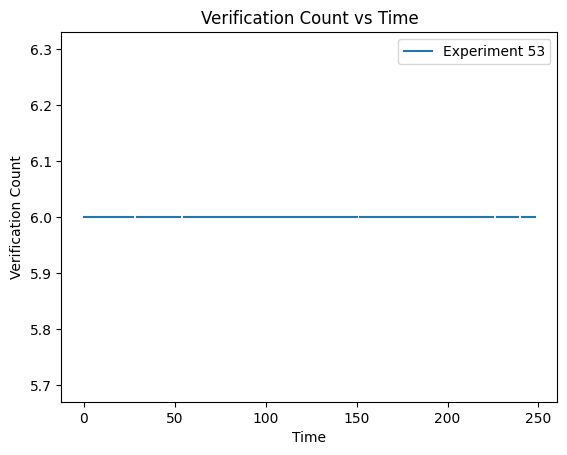

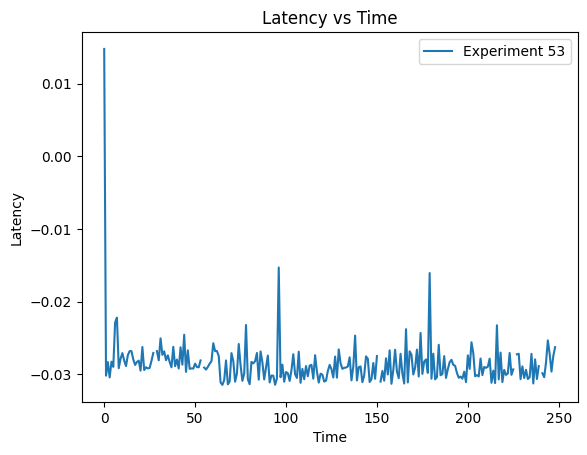

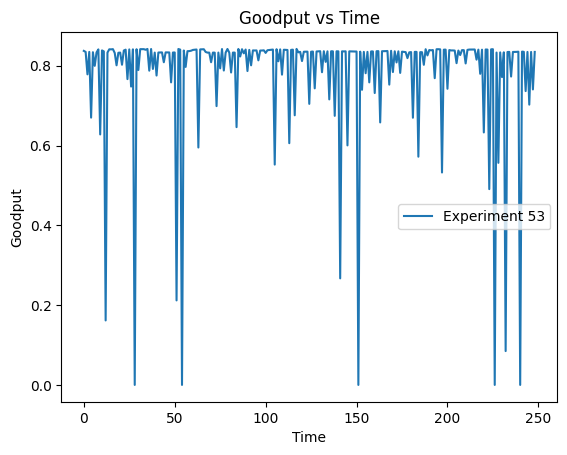

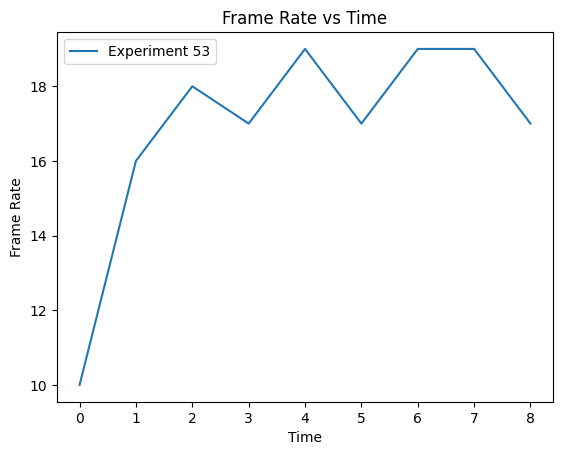

Experiment 54


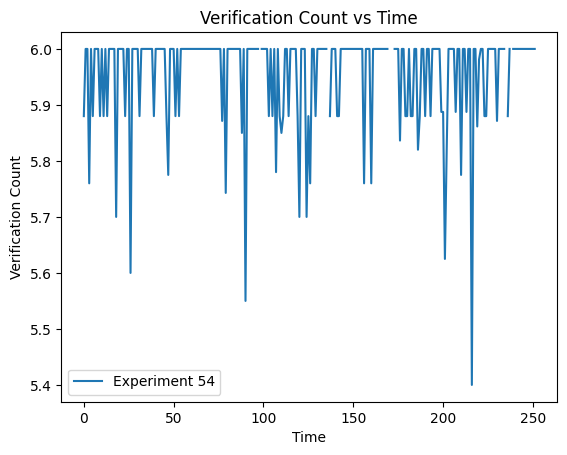

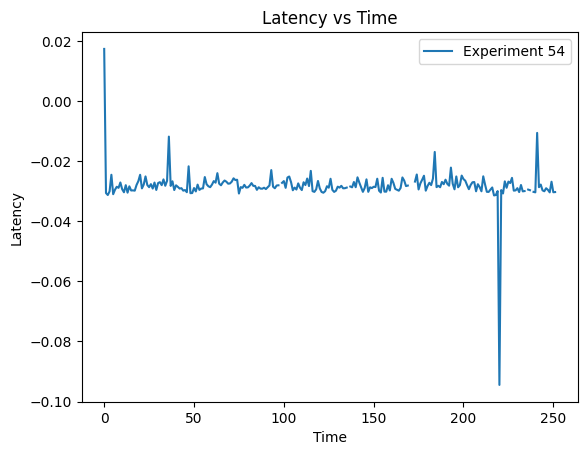

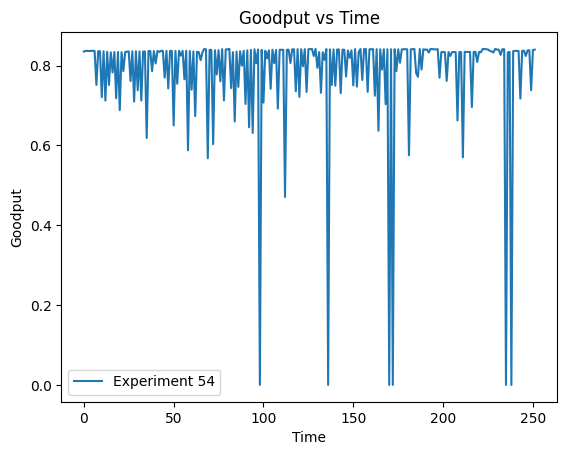

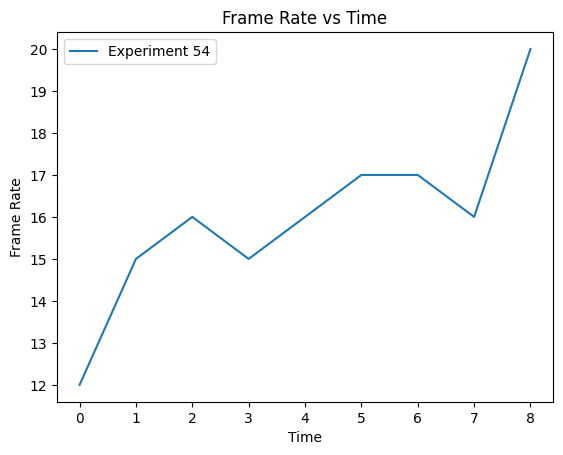

Experiment 55


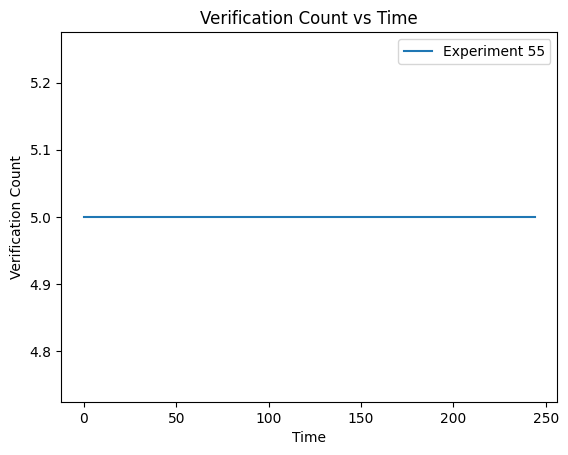

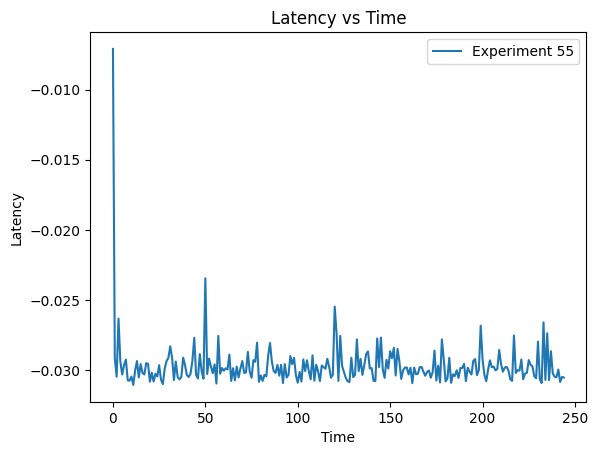

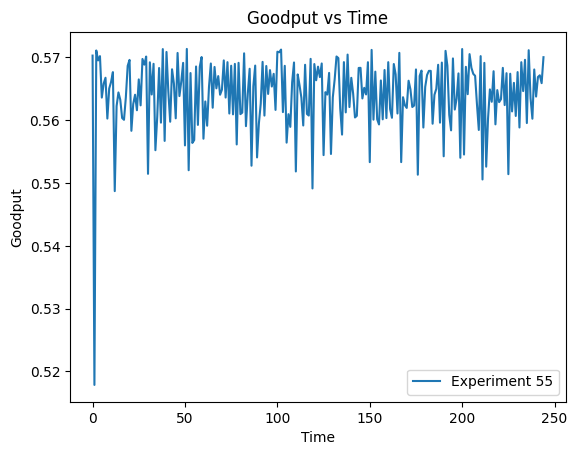

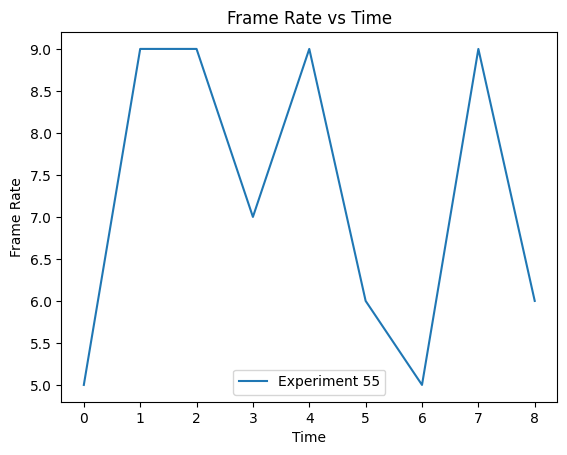

Experiment 56


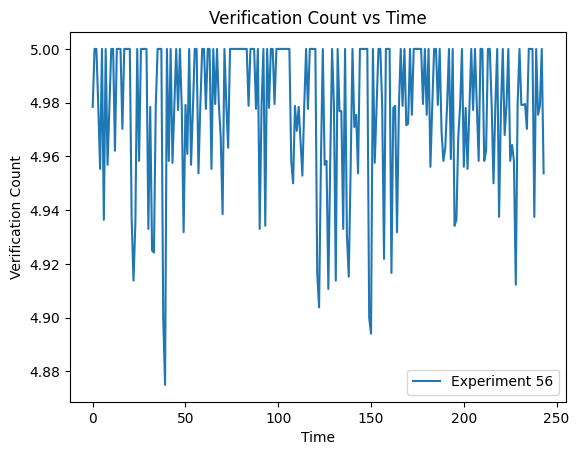

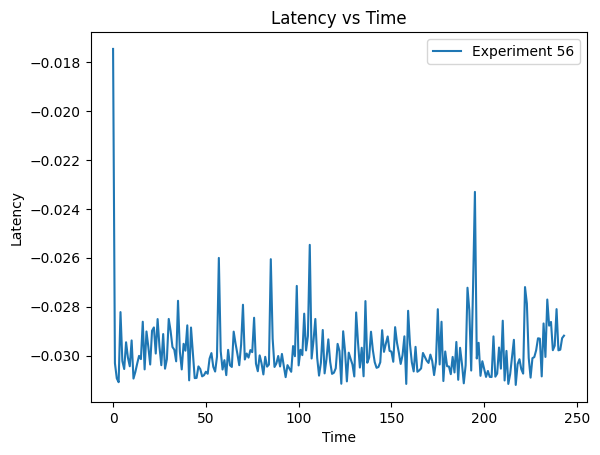

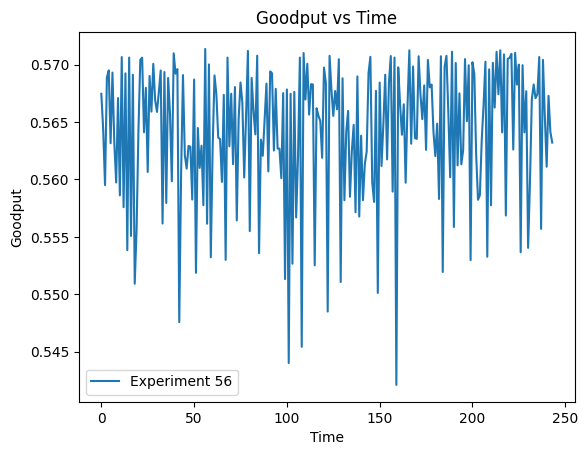

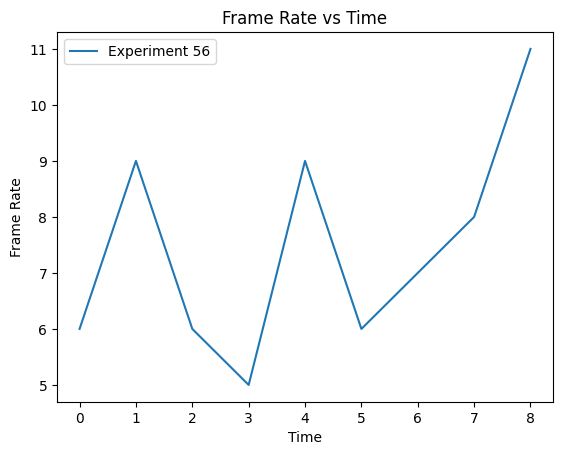

Experiment 57


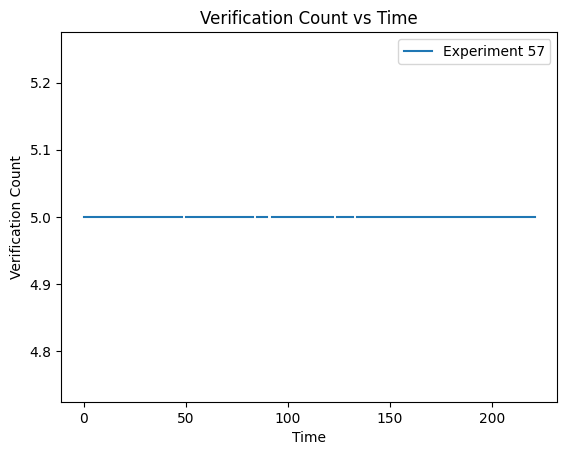

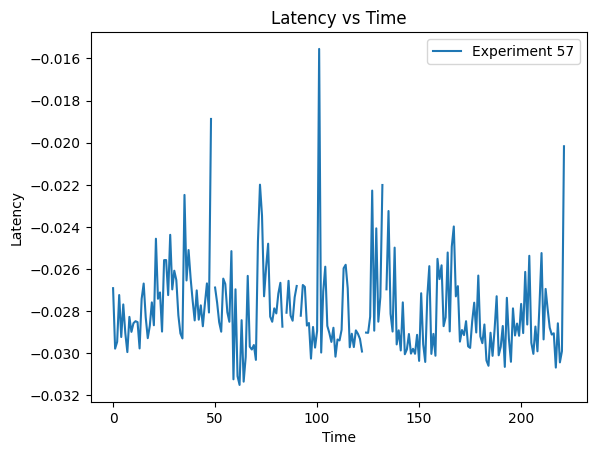

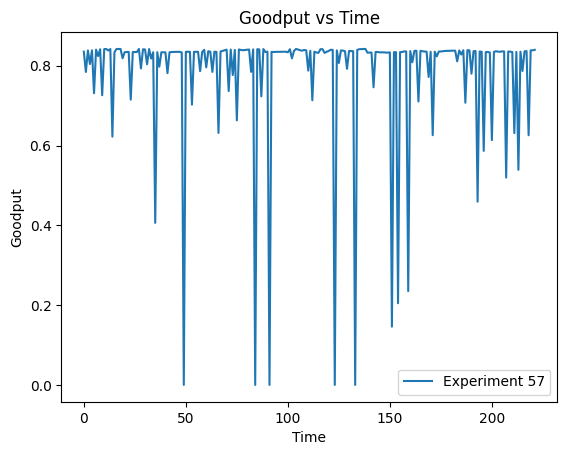

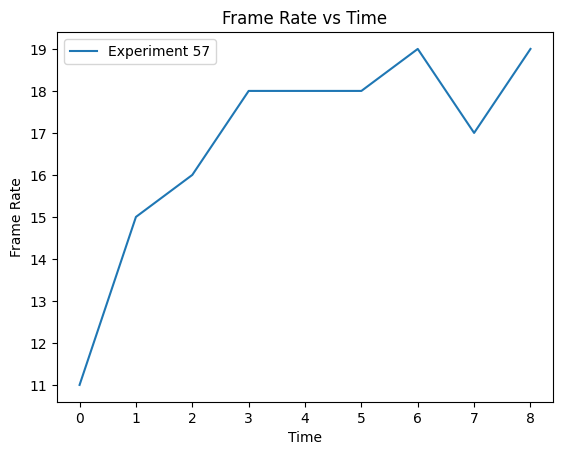

Experiment 58


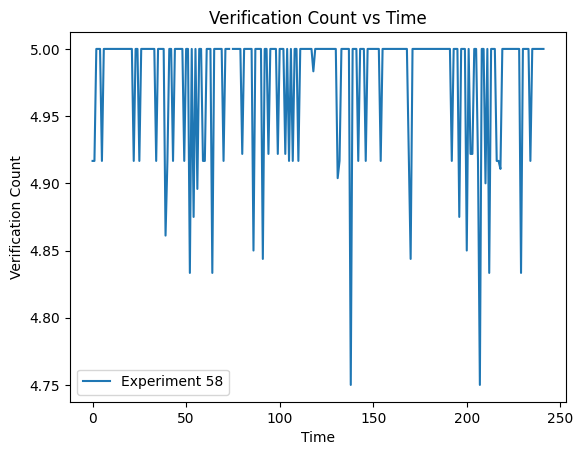

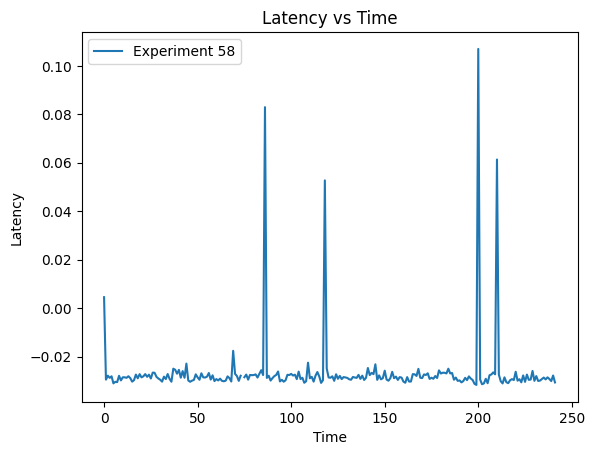

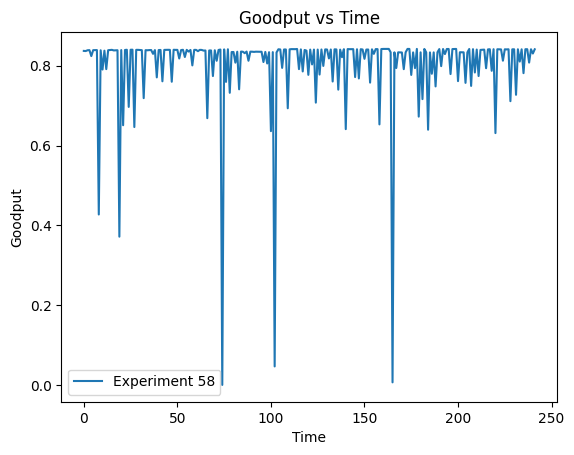

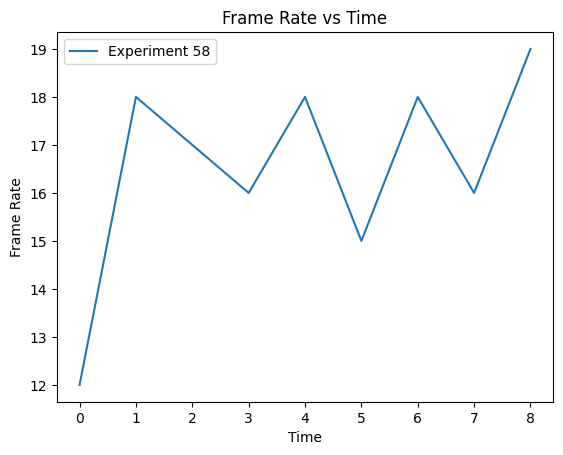

Experiment 59


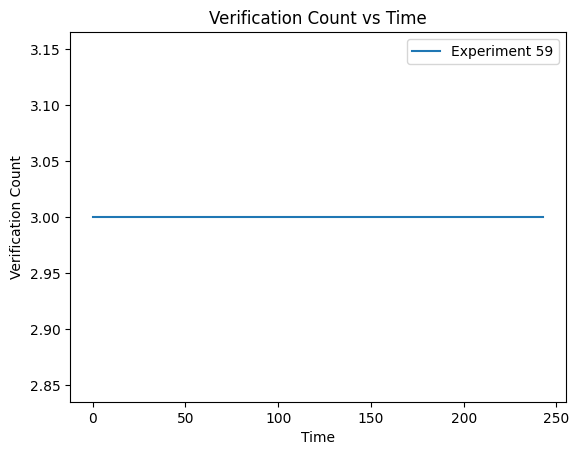

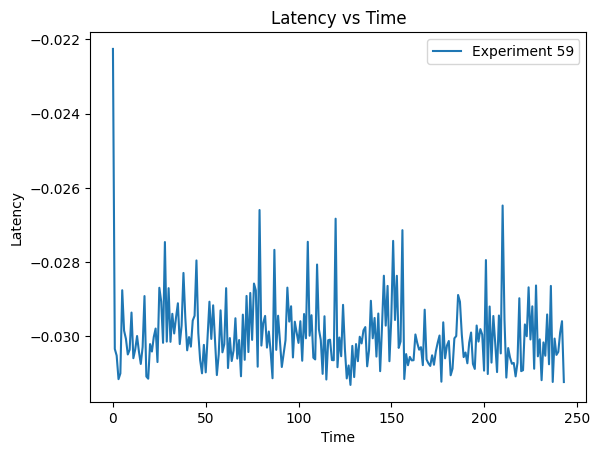

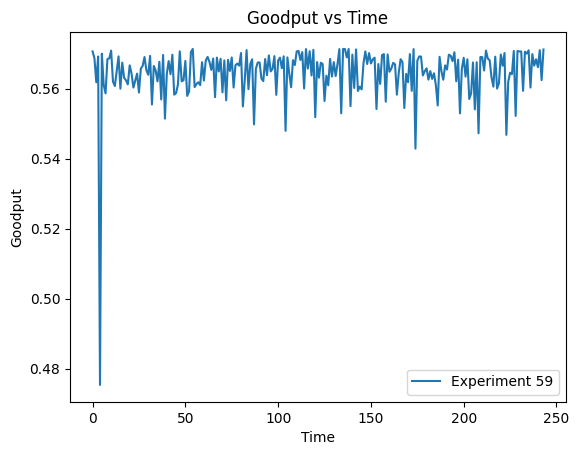

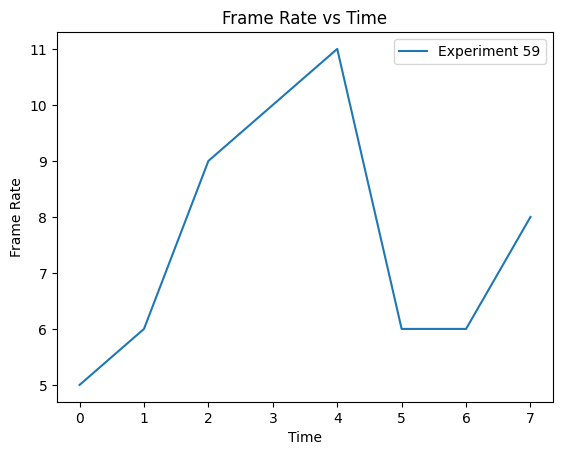

Experiment 60


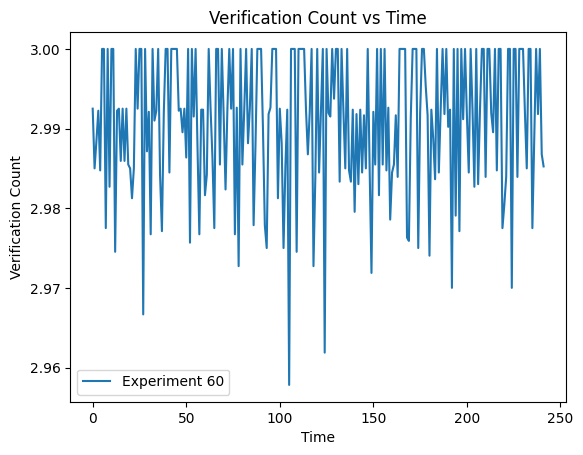

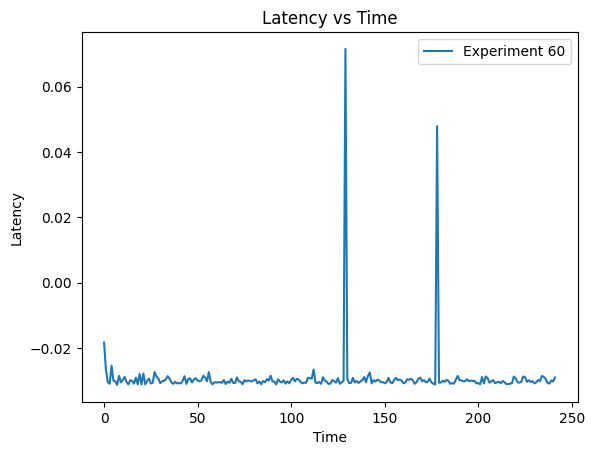

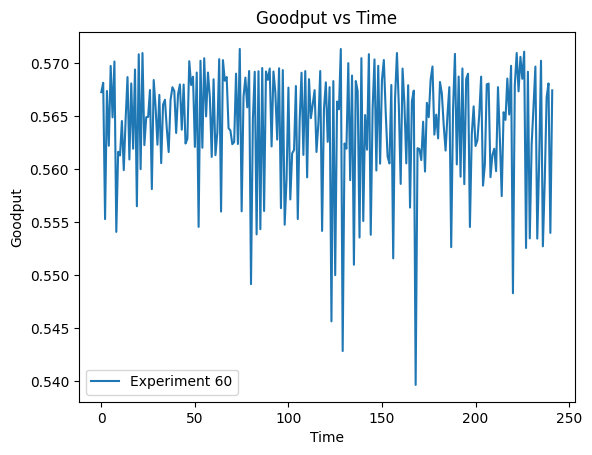

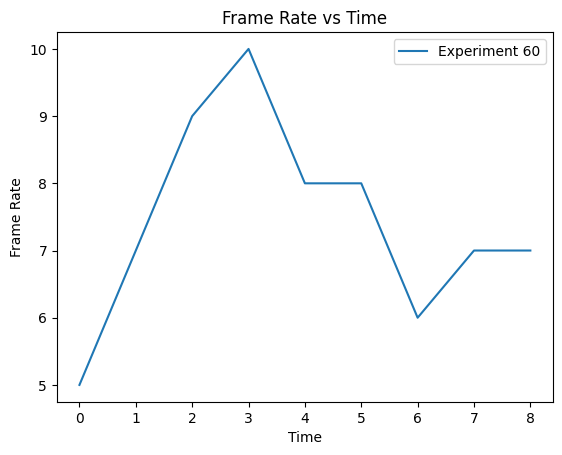

Experiment 61


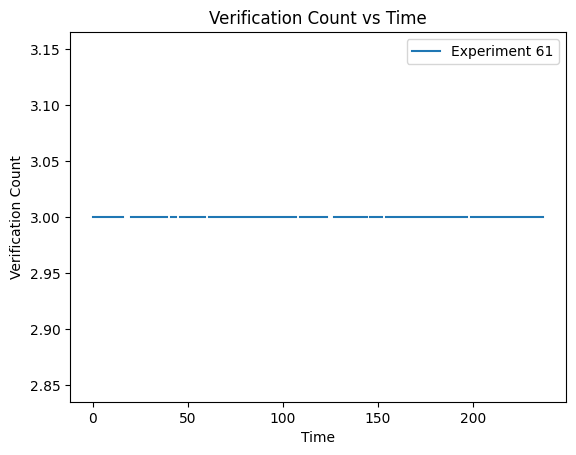

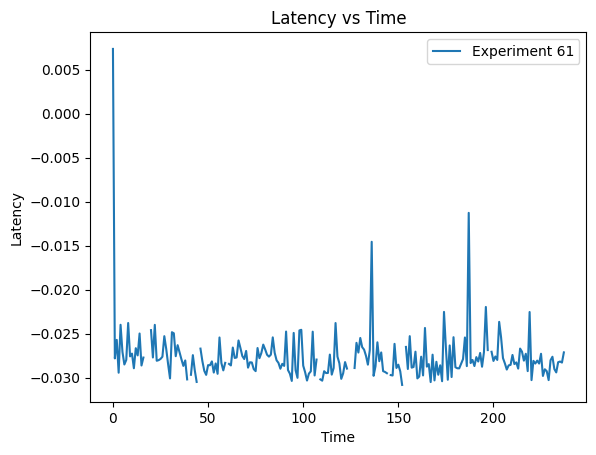

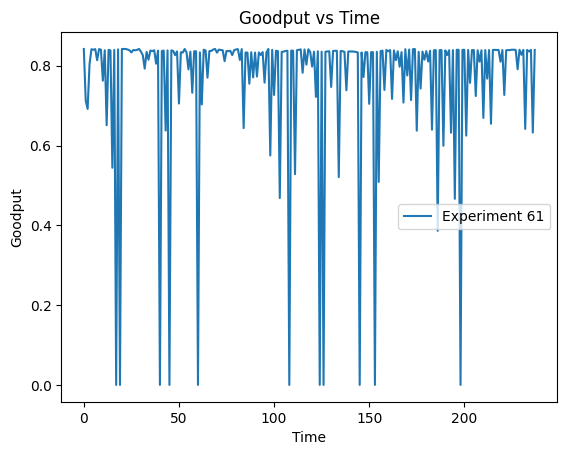

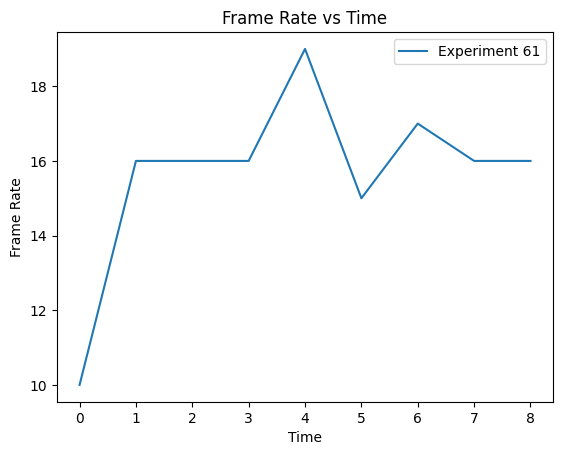

Experiment 62


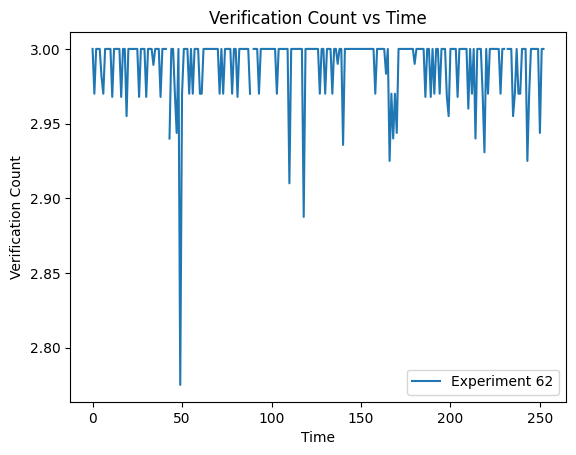

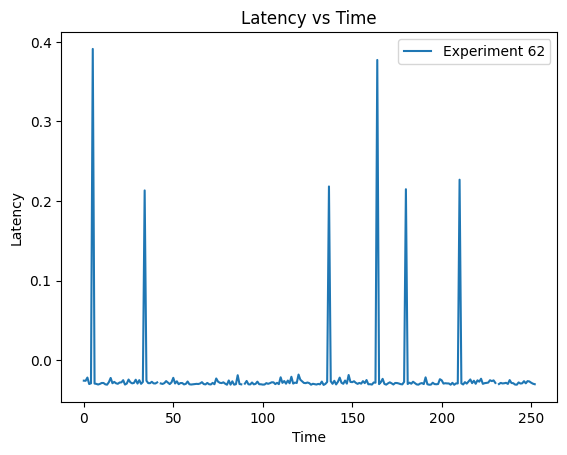

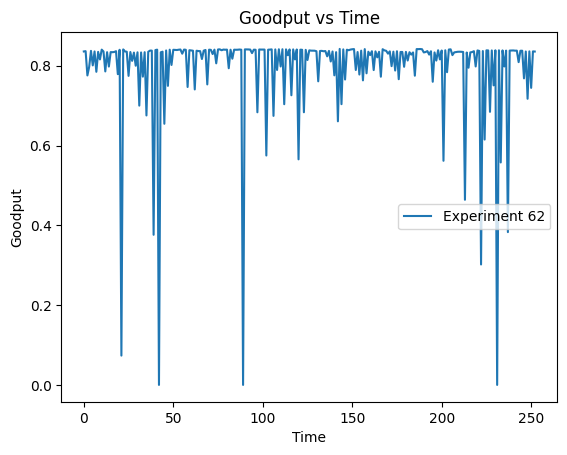

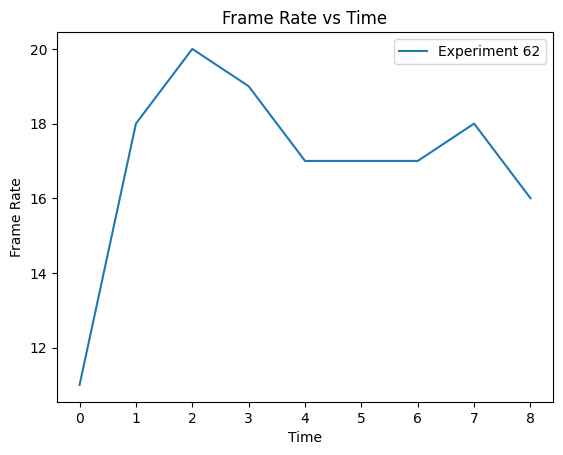

{'X': [[1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1]], 'Y': [[0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], 

In [3]:
# opening the pickle file and plotting the results
with open("results.pkl", 'rb') as f:
    results = pickle.load(f)
    for i in range(len(results)- 10, len(results)):
        print(f"Experiment {i}")
        plt.plot(results[i]['avg_verification'], label=f"Experiment {i}")
        plt.xlabel('Time')
        plt.ylabel('Verification Count')
        plt.title('Verification Count vs Time')
        plt.legend()
        plt.show()

        plt.plot(results[i]['latency'], label=f"Experiment {i}")
        plt.xlabel('Time')
        plt.ylabel('Latency')
        plt.title('Latency vs Time')
        plt.legend()
        plt.show()

        plt.plot(results[i]['goodput'], label=f"Experiment {i}")
        plt.xlabel('Time')
        plt.ylabel('Goodput')
        plt.title('Goodput vs Time')
        plt.legend()
        plt.show()

        plt.plot(results[i]['frame_rate'], label=f"Experiment {i}")
        plt.xlabel('Time')
        plt.ylabel('Frame Rate')
        plt.title('Frame Rate vs Time')
        plt.legend()
        plt.show()
    print(results[0]['param'])